In [2]:
### necessary Imports
import numpy as np
import pylab as pb
import scipy as sc
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as MNormalDist

### Question 3:

In [35]:
def gaussian(a,b,s):
    diff = a-b
    return np.exp(-0.5*(diff).dot(diff)/(s**2))

In [89]:
def gaussian_Kernel(x,z,s):
    n = x.shape[0]
    m = z.shape[0]
    kernel = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            kernel[i,j] = gaussian(x[i,],z[j,:],s)
    return np.mat(kernel)

### Question 4: 

In [90]:
def parzen_classify(train,test,y_train):
    Mp = 0
    Sp=0
    Mm=0
    Sm=0
    for i in range(train.shape[0]):
        for j in range(train.shape[1]):
            if y_train[i] == 1 and y_train[j] == 1:
                Mp += 1
                Sp += train[i,j]

            else:
                Mm += 1
                Sm += train[i,j]
    b =  0.5*Sm/(Mm**2) - 0.5*Sp/(Mp**2)
    sumPred = np.ones(test.shape[1])
    for j in range(test.shape[1]):
        for i in range(test.shape[0]):
            if y_train[i] == 1:
                alphaI = 1/Mp
            else:
                alphaI = 1/Mm
            sumPred[j] = alphaI*test[i,j] + b
    return np.sign(sumPred)

In [74]:
X_test = np.loadtxt("/home/nautiys1/Downloads/X_test.txt")
X_train = np.loadtxt("/home/nautiys1/Downloads/X_train.txt")
y_train = np.loadtxt("/home/nautiys1/Downloads/y_train.txt")
y_test = np.loadtxt("/home/nautiys1/Downloads/y_test.txt")

In [91]:
train = gaussian_Kernel(X_train,X_train,s=1)
test = gaussian_Kernel(X_train,X_test,s=1)
pred = parzen_classify(train,test,y_train)

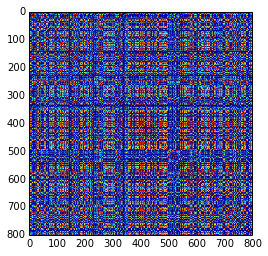

In [94]:
%matplotlib inline
plt.imshow(train)